In [1]:
import pandas as pd

load_frame = pd.read_csv('corn_not_corn%.csv',dtype={'year':int})
load_frame.index = pd.to_datetime(load_frame['year'],format='%Y')

In [2]:
load_frame = load_frame.drop(['Unnamed: 0','year'],axis =1)

In [3]:
corn_frame = pd.DataFrame(index=load_frame.index.unique(),columns=load_frame['county_name'].unique())

In [4]:
print(load_frame)

           county_name commodity_desc     value   percent
year                                                     
1919-01-01      DICKEY           CORN   31000.0  0.093373
1919-01-01      DICKEY       NOT CORN  301000.0  0.906627
1919-01-01    LA MOURE           CORN   18000.0  0.046997
1919-01-01    LA MOURE       NOT CORN  365000.0  0.953003
1919-01-01       LOGAN           CORN    2000.0  0.009524
...                ...            ...       ...       ...
2020-01-01    LA MOURE       NOT CORN  210570.0  0.774667
2020-01-01       LOGAN           CORN   28220.0  0.166588
2020-01-01       LOGAN       NOT CORN  141180.0  0.833412
2020-01-01    MCINTOSH           CORN   39280.0  0.175986
2020-01-01    MCINTOSH       NOT CORN  183920.0  0.824014

[802 rows x 4 columns]


In [5]:
load_frame_perc = load_frame[load_frame['commodity_desc']=='CORN'][['county_name','value']]

In [6]:
for county in corn_frame.columns:
    corn_frame[county] = load_frame_perc[load_frame_perc['county_name'] == county]['value']

In [19]:
corn_not_corn = pd.DataFrame(index=load_frame.index.unique(),columns=load_frame[load_frame['county_name'] == 'DICKEY']['commodity_desc'].unique())

In [30]:
logan_frame = load_frame[load_frame['county_name'] == 'LOGAN']
logan_frame = logan_frame.drop(columns=['county_name','percent'])

In [31]:
print(logan_frame)

           commodity_desc     value
year                               
1919-01-01           CORN    2000.0
1919-01-01       NOT CORN  208000.0
1920-01-01           CORN    4000.0
1920-01-01       NOT CORN  218000.0
1921-01-01           CORN    7000.0
...                   ...       ...
2017-01-01       NOT CORN  163110.0
2018-01-01       NOT CORN   53300.0
2019-01-01       NOT CORN   43200.0
2020-01-01           CORN   28220.0
2020-01-01       NOT CORN  141180.0

[199 rows x 2 columns]


In [33]:
for col in corn_not_corn.columns:
    corn_not_corn[col] = logan_frame[logan_frame['commodity_desc'] == col]['value']

In [35]:
corn_not_corn = corn_not_corn.interpolate()

In [7]:
corn_frame = corn_frame.interpolate()

In [8]:
from statsmodels.tsa.vector_ar.var_model import VAR
from matplotlib import pyplot as plt

train = corn_frame[:90]
valid = corn_frame[90:]

model = VAR(endog=train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.endog,steps=len(valid))

pred = pd.DataFrame(prediction,index=corn_frame.index[90:],columns=corn_frame.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


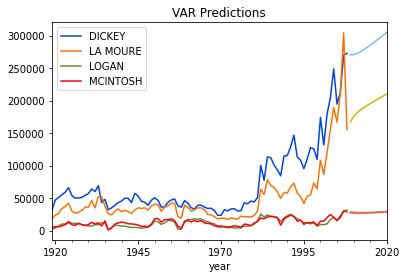

In [17]:
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

ax = train.plot(color={'DICKEY':'xkcd:blue','LA MOURE':'xkcd:orange','LOGAN':'xkcd:moss green','MCINTOSH':'xkcd:bright red'})
pred.plot(ax=ax,color={'DICKEY':'xkcd:sky blue','LA MOURE':'xkcd:mustard','LOGAN':'xkcd:light moss green','MCINTOSH':'xkcd:light red'},legend=False)
plt.title('VAR Predictions')
plt.savefig('VAR Predictions.png')
plt.show()

In [10]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 10, Apr, 2021
Time:                     01:53:15
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    71.0026
Nobs:                     89.0000    HQIC:                   70.6688
Log likelihood:          -3619.87    FPE:                3.92065e+30
AIC:                      70.4433    Det(Omega_mle):     3.15070e+30
--------------------------------------------------------------------
Results for equation DICKEY
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const            6047.365071      4772.461167            1.267           0.205
L1.DICKEY           0.959179         0.100067            9.585           0.000
L1.LA MOURE         0.130474         0.113241            1.152     

In [13]:
from statsmodels.tsa.vector_ar.var_model import LagOrderResults



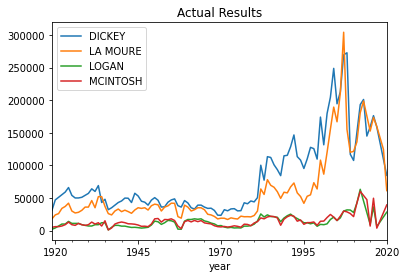

In [18]:
corn_frame.plot()
plt.title('Actual Results')
plt.savefig('4countyactual.png')

In [47]:
train = corn_not_corn[:90]
cncVAR = VAR(train,dates=train.index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [48]:
cncfit = cncVAR.fit(6)

In [49]:
prediction = cncfit.forecast(cncfit.endog,steps=len(valid))

In [50]:
pred = pd.DataFrame(prediction,index=corn_not_corn.index[90:],columns=corn_not_corn.columns)

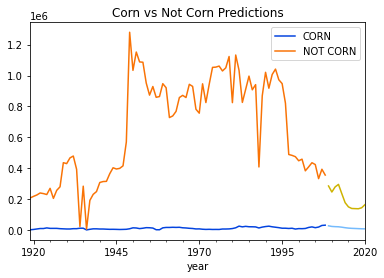

In [53]:
ax = train.plot(color={'CORN':'xkcd:blue','NOT CORN':'xkcd:orange'})
pred.plot(ax=ax,color={'CORN':'xkcd:sky blue','NOT CORN':'xkcd:mustard'},legend=False)
plt.title('Corn vs Not Corn Predictions')
plt.savefig('VARcornnotcorn.png')
plt.show()

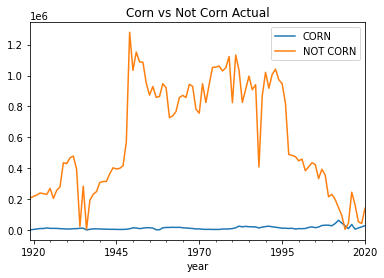

In [54]:
corn_not_corn.plot()
plt.title('Corn vs Not Corn Actual')
plt.savefig('Actualcornnotcorn.png')
plt.show()